# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff   #symbols = to write math. notations , diff = allows us to differentiate a math. function

from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

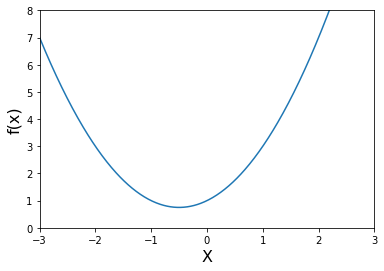

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Challenge: Create a python function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2*x + 1

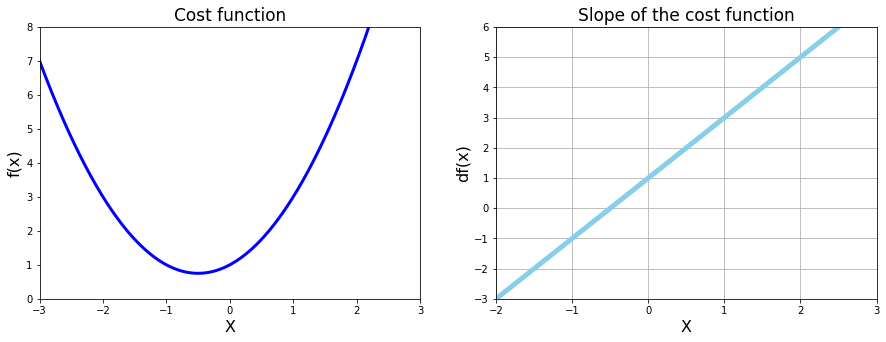

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [7]:
# Python For Loop
for n in range(5):
    print('Hello World', n)
print('End of loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [8]:
# Python while loop
counter = 0
while counter < 5:
    print('Counting ...', counter)
    counter = counter + 1
print('Ready or not, here I come!')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Ready or not, here I come!


In [9]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


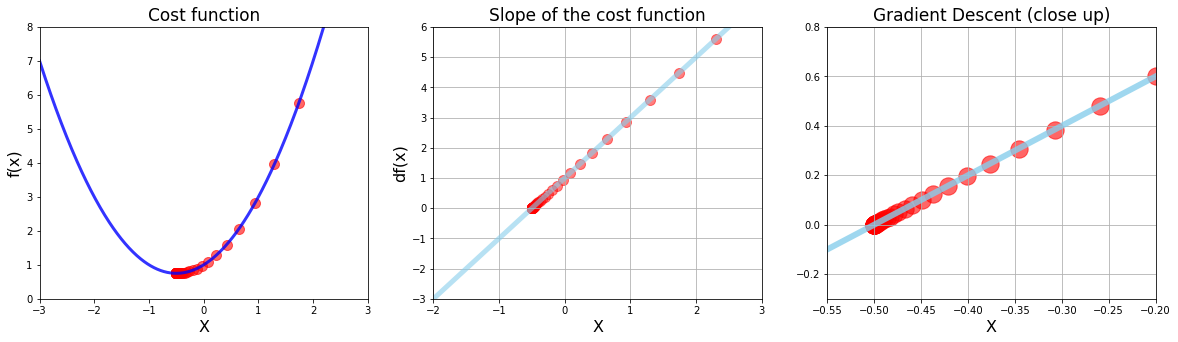

In [10]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# Challenge: Write the g(x) function and the dg(x) function in Python?
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

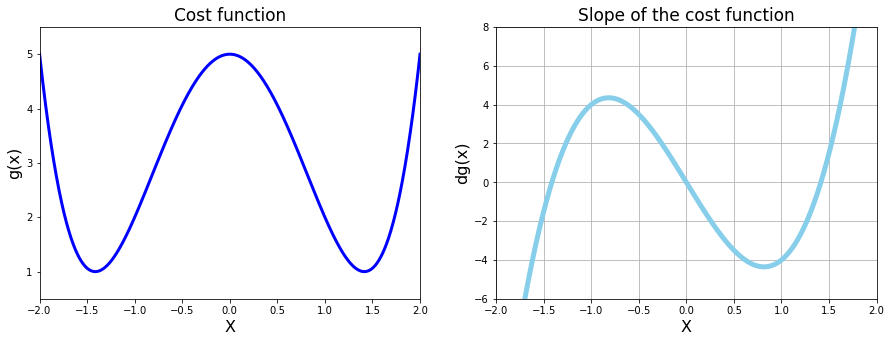

In [12]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, 
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5, 
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


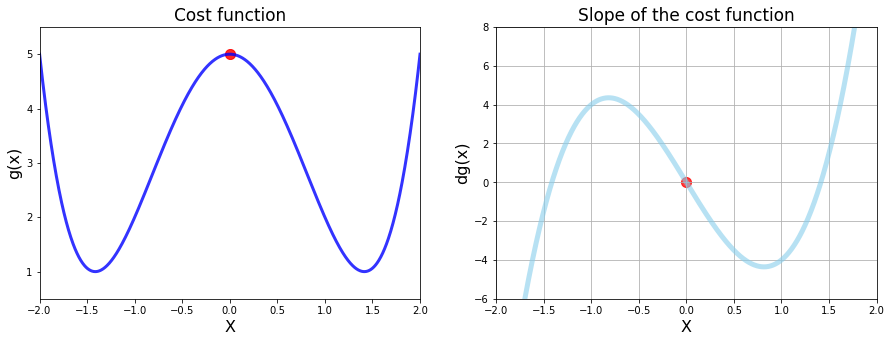

In [17]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [18]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

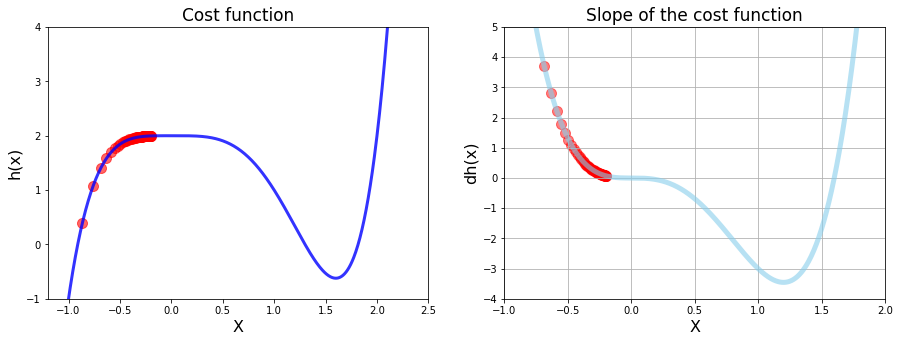

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [19]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, 
                                                max_iter=71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [20]:
# 380,000,000,000,000,000,000,000,000,000
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [21]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

# How to access a value in a tuple
print('I looooove ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014

tuple_with_single_value = 42,
type(tuple_with_single_value)

main, side, greens = breakfast
print('Main course is ', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I looooove  bacon
My hotel has no 4th floor
Main course is  bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


# The Learning Rate

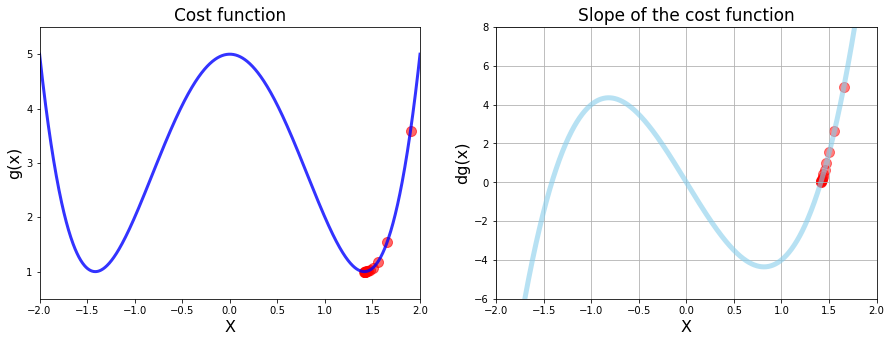

Number of steps is:  14


In [22]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

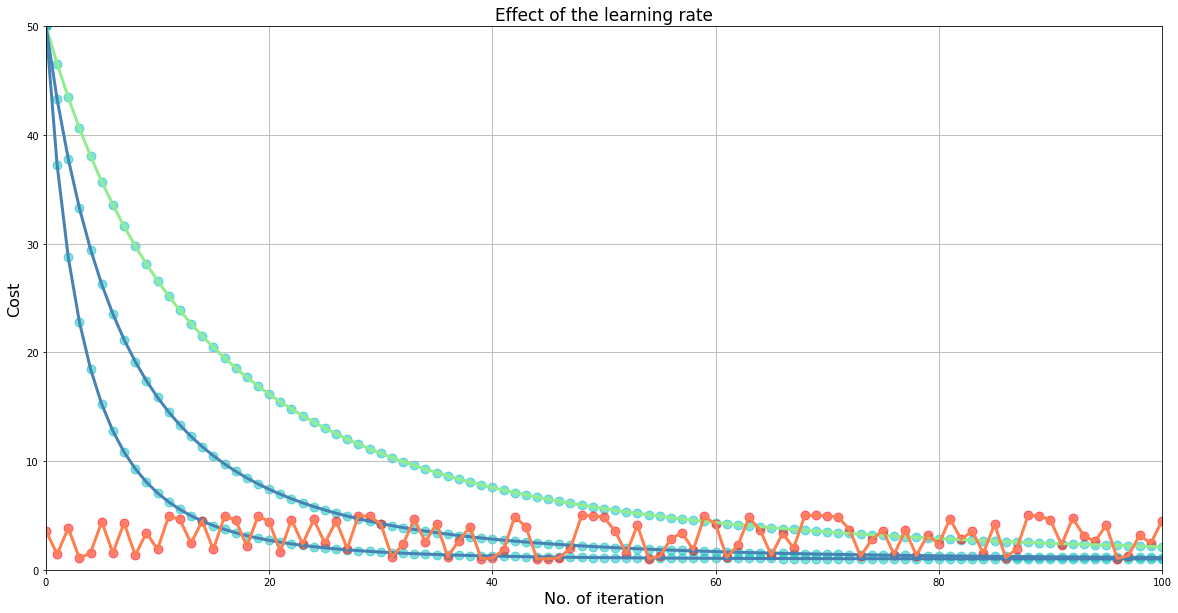

In [23]:
# Running gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision = 0.0001,  max_iter=n)
#plotting two more learning rate
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision = 0.0001,  max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.002, precision = 0.0001,  max_iter=n)

#Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision = 0.0001,  max_iter=n)


# Ploting reduction in cost for each iteration

plt.figure(figsize=[20, 10])


plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No. of iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)

#value for our charts
#1.Y axis: Convert list into numpy array
low_values = np.array(low_gamma[1])

#2.X axis: create a list from 0 to n+1
iteration_list = list(range(0, n+1))


#plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=3)
plt.scatter(iteration_list, g(low_values), color='c', s=80 , alpha = 0.5)


#mid learnig rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=3)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='c', s=80, alpha = 0.5)

#high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='steelblue', linewidth=3)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='c', s=80, alpha = 0.5)

#insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='coral', linewidth=3)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='r', s=80, alpha = 0.5)



plt.grid()
plt.show()


## Example 04: Data viz with 3D charts

### Minimise  $$ f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1} $$

In [24]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r  + 1)

In [25]:
# making our x and y data
x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start = -2, stop = 2, num = 200)
print('Shape of x array: ', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)    #for converting 1d array to 2d array
print('Array after meshgrid: ', x_4.shape)

Shape of x array:  (200,)
Array after meshgrid:  (200, 200)


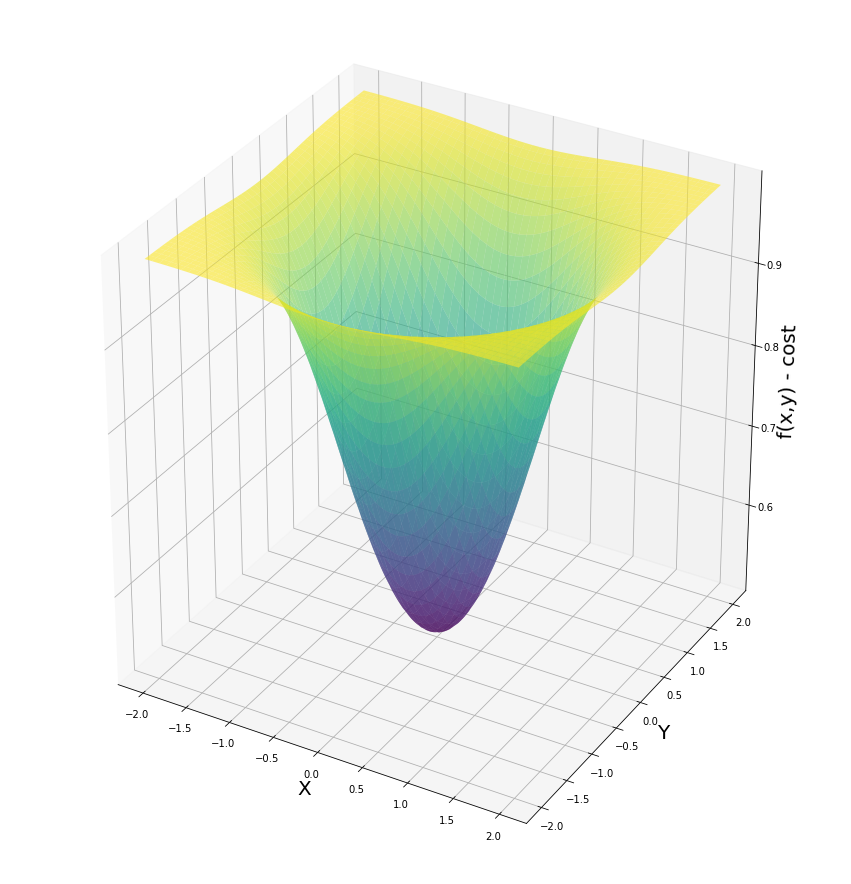

In [26]:
#Generating 3d plot
fig = plt.figure(figsize = [15, 16])
ax = fig.gca(projection = '3d')             #gca = get current axis

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x,y) - cost', fontsize = 20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.viridis, alpha = 0.6)
plt.show()

## Partial derivatives and symbolic computation
## $$ \frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}} { \left( 3^{-x^2 - y^2} + 1 \right) ^ 2}$$

## $$ \frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}} { \left( 3^{-x^2 - y^2} + 1 \right) ^ 2}$$

In [27]:
a, b = symbols('x, y')
print('Our cost function f(x, y): ', f(a, b))
print('Partial derivative wrt to x: ',diff(f(a, b), a))
print('Value of f(x, y) at x = 1.8 and y = 1.0: ',f(a, b).evalf(subs = {a : 1.8, b : 1.0})) 
                                                #evalf = evaluate function works as a dictionary "a" is key "1.8" is value
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs = {a : 1.8, b : 1.0}))

Our cost function f(x, y):  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt to x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x = 1.8 and y = 1.0:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


## Batch gradient descent with sympy

In [28]:
# setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  #initial guess

for i in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs = {a: params[0], b: params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs = {a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# results
print('Values in gradient array: ',gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('Cost: ',f(params[0], params[1]))

Values in gradient array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
Cost:  0.500000000000000


In [29]:
# partial derivative example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r/ (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r/ (r + 1)**2

In [30]:
# setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  #initial guess

for i in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1, 2), axis = 0)
    
# results
print('Values in gradient array: ',gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('Cost: ',f(params[0], params[1]))

NameError: name 'values_array' is not defined

## Graphing 3D Gradient descent and advance Numpy arrays

In [31]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


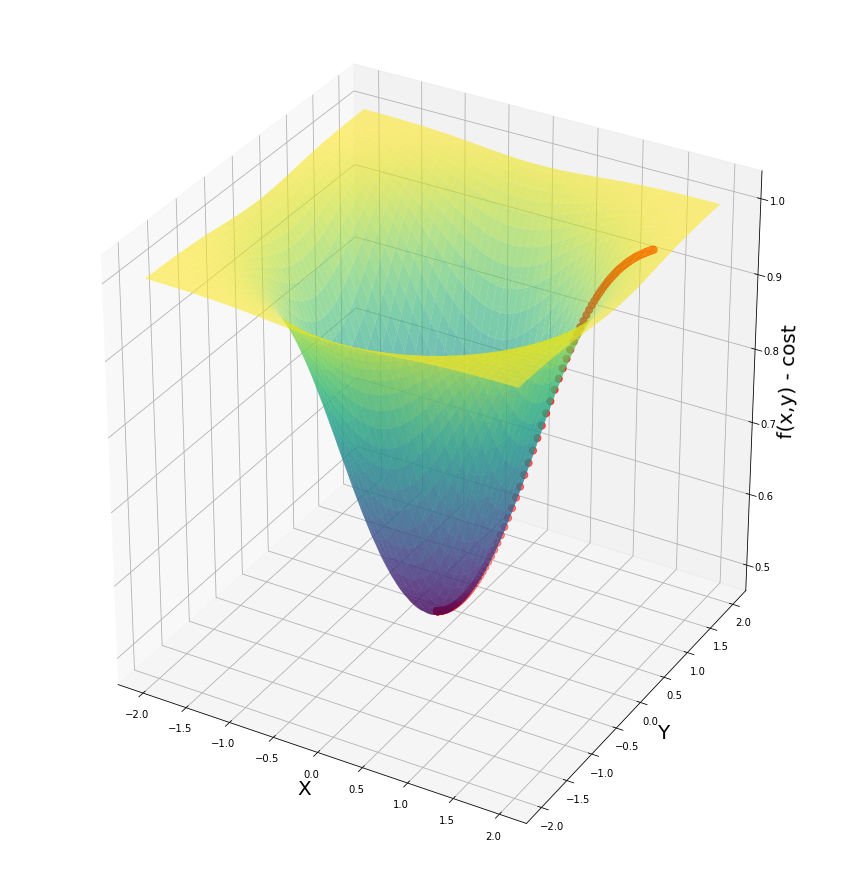

In [32]:
#Generating 3d plot
fig = plt.figure(figsize = [15, 16])
ax = fig.gca(projection = '3d')             #gca = get current axis

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x,y) - cost', fontsize = 20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.viridis, alpha = 0.6)

ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s = 50, c = 'r')
plt.show()

In [33]:
# Advanced Numpy array practice:

jdm = np.array([['R34', 'R35']])
print(jdm.shape)

car = np.array([['turbo', 'straightpipe'],['bbs', 'carbon']])
print(car.shape)

community = np.append(arr = car, values = jdm, axis = 0)
print(community)

(1, 2)
(2, 2)
[['turbo' 'straightpipe']
 ['bbs' 'carbon']
 ['R34' 'R35']]


## Example 05: Working with data and real cost function
### Mean Squared Error: a cost function for regression problem
### $$ RSS = \sum_{i = 1}^{n} \big( y^{i} - h_\theta x^{i} \big)^2  $$
### $$ MSE = \frac{i}{n}  \sum_{i = 1}^{n} \big( y^{i} - h_\theta x^{i} \big)^2  $$

In [34]:
# making sample data
x_5 = np.array([[1.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()  #TO MAKE IT 2D
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)  #same
print(x_5.shape , y_5.shape)

(7, 1) (7, 1)


In [35]:
# quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print("Theta 0: ", regr.intercept_[0])
print("Theta 1: ", regr.coef_[0][0])

Theta 0:  0.20226098191214525
Theta 1:  1.358850129198966


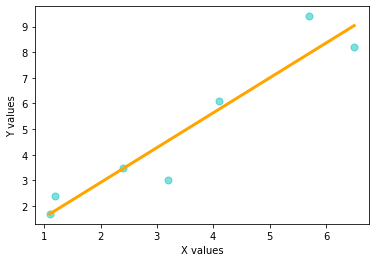

In [36]:
#plot
plt.scatter(x_5, y_5, s = 50, c = 'c', alpha = 0.5)
plt.plot(x_5, regr.predict(x_5), c = 'orange', lw = 3)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [37]:
# y_hat = theta0 + theta1*x
y_hat = 0.20226098191214525 + 1.358850129198966*x_5
print('Estimated values y_hat: \n', y_hat) 
print('The actual Y values: \n', y_5)


Estimated values y_hat: 
 [[1.69699612]
 [1.83288114]
 [3.46350129]
 [4.5505814 ]
 [5.77354651]
 [7.94770672]
 [9.03478682]]
The actual Y values: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [38]:
def mse(y , y_hat):
    mse_calc = 1/7 * sum((y - y_hat)**2)
    return mse_calc

In [39]:
mse(y_5, y_hat)

array([0.80569491])

## 3D plot for the MSE cost function
### Make data for thetas

In [49]:
nr_thetas = 200
th_0 = np.linspace(start = -1, stop = 3, num = nr_thetas)
th_1 = np.linspace(start = -1, stop = 3, num = nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc mse using nested for loop

In [50]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i  in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j]* x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape of plot_t0: ', plot_t0.shape)
print('Shape of plot_t1: ', plot_t1.shape)
print('Shape of plot_cost: ', plot_cost.shape)

Shape of plot_t0:  (200, 200)
Shape of plot_t1:  (200, 200)
Shape of plot_cost:  (200, 200)


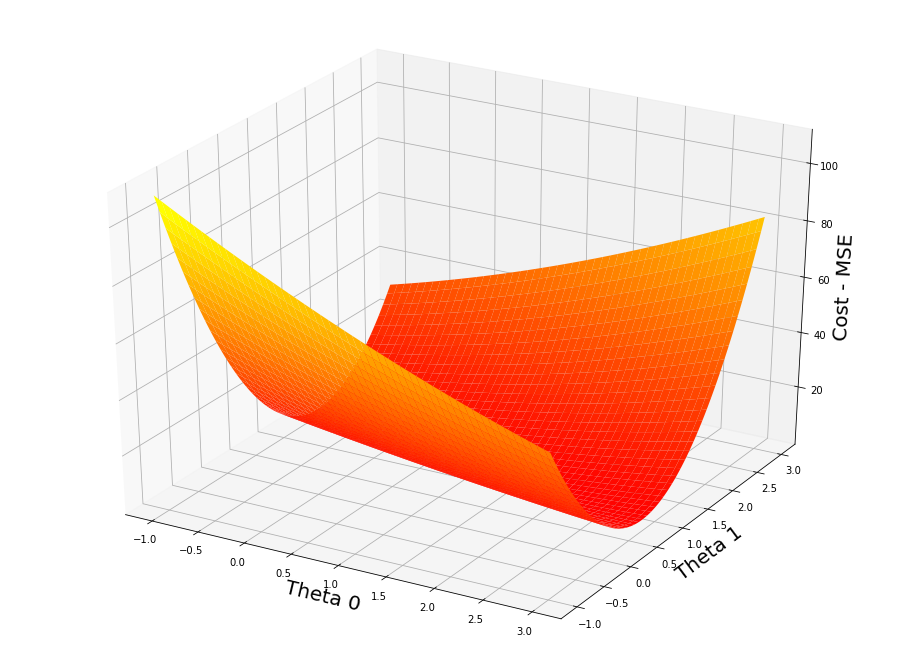

In [59]:
# plotting mse
fig = plt.figure(figsize = [16, 12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('Cost - MSE', fontsize = 20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.autumn)
plt.show()

In [58]:
print('Min value of plot_cost: ', plot_cost.min())
ij_min = np.unravel_index(indices = plot_cost.argmin(), dims = plot_cost.shape)
print('Min occurs at (i, j): ', ij_min)
print('Min MSE for theta 0 at plot_t0[117][61]: ', plot_t0[117][61])
print('Min MSE for theta 0 at plot_t1[117][61]: ', plot_t1[117][61])

Min value of plot_cost:  0.8058859624756951
Min occurs at (i, j):  (117, 61)
Min MSE for theta 0 at plot_t0[117][61]:  0.22613065326633164
Min MSE for theta 0 at plot_t1[117][61]:  1.3517587939698492


<ipython-input-58-59bd9b6075cd>:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  ij_min = np.unravel_index(indices = plot_cost.argmin(), dims = plot_cost.shape)


## Partial derivative of MSE wrt $\theta_0$ and $\theta_1$
 
## $$\frac{\partial MSE}{\partial\theta_0} = - \frac{2}{n} \sum_{i = 1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial\theta_0} = - \frac{2}{n} \sum_{i = 1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

### MSE and gradient descent 

In [60]:
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [61]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.22476005389912534
Min occurs at Theta 1: 1.353836199827692
MSE is: [0.80581689]


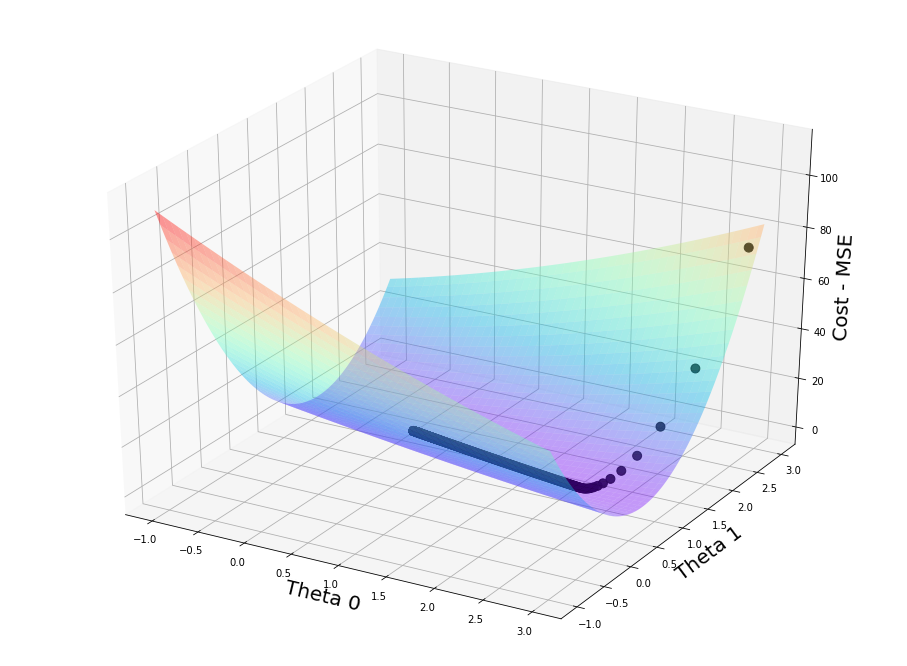

In [62]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()